# Diploma in Artificial Intelligence

# AI Programming (April 2021), Session 4

# Topic: Text Analysis

Plese run the next cell to import libraries needed in the exercise

In [1]:
# Execute this code first to set up required libraries
import matplotlib.pyplot as plt
import numpy as np
import string

### Text as vectors

In this exercise we perform basic text data analysis and convert text data to word vectors. Some questions that we will address are:  
* What is the relative frequency of each letter? (Useful for e.g. recognizing the language)
* What are the most frequent words in the document?
* Which words appear close to each other? (Subject matter recognition, plagiarism detection)

The given python-script in below will read in a text file. In addition, the script has a function to count the frequency (number of occurrences) of each word. As an example, a typical preprocessing will be demonstrated. All characters are processed as case-**insensitive** (meaning: capital 'A' equals 'a'), and punctuation is removed (in a quite rudimentary manner).

Three sample text files are provided. Look at how the word frequency histogram changes according to text. The files contain the text of three classic novels/plays: "The Picture of Dorian Gray" by Oscar Wilde, "Pride and Prejudice" by Jane Austen, and "Faust" by Johann Wolfgang von Goethe (in German). Find more books from [Project Gutenberg](http://www.gutenberg.org/) and choose your favorite to be analyzed analysis. Later with installation of NLTK, the book library is substantially expanded.

We will have following tasks:  
1. Execute ready made script. Check outputs when while changing book index to 0, 1, 2 or 3. The number three will fail and you have to find why and fix the problem   
2. Perform similar analysis as in the given scripts, but this time utilize scikit-learn functions.  
3. Challenge task: Calculate Levenshtein distance of each word in Kalevala to official vocabulary at Kotus.  
4. Challenge task: Calculate Levenshtein distance of Kalevala words to Finnish dialects, which dialect is closest to Kalevala and why?

Links for challenge tasks:  
[Kalevala](https://github.com/JaanaM/2016-nodl-ohjelmointi/blob/master/viikko10-Viikko10_170.RivitJoillaSana/kalevala.txt)  
[Kotus](https://www.kielitoimistonsanakirja.fi/netmot.exe?motportal=80)  
[Dialects](http://kaino.kotus.fi/sms/)  

## Task 1 : Processing text intro/demo  
Familiarize yourself with given scripts below and see how analysis performs with different languages (and books). 

In [2]:
def word_frequency(words):
    # start with an empty dictionary d
    # where words and their frequencies will be stored
    d = {}
    # go through the words, keep track of how many times each word occurs
    for word in words:        
        # increase word count
        try:
            d[word] += 1
        except KeyError:
            # word does not yet exist in dictionary, set count to 1
            d[word] = 1
    return d

def get_corpus(filename):    
    with open(filename, encoding="utf8") as f:
        # use lowercase representation of each word
        # ('the' and 'The' are equal for our purposes)
        # and remove punctuation (not part of word)
        translation_table = dict.fromkeys(map(ord, '"_?!,.-)(_$'), None)
        return [word.lower() for line in f for word in line.translate(translation_table).split()]
    
texts = ['doriangray.txt', 'prideandprejudice.txt', 'faust.txt', 'kalevala.txt']
print('These texts are available:')
print(texts)

These texts are available:
['doriangray.txt', 'prideandprejudice.txt', 'faust.txt', 'kalevala.txt']


Given the two helper functions above do following tasks:
* Select one of the given books or your own book
* Create corpus and print word count
* Check how many unique words are available in the corpus
* Print 30 most frequent words
* Plot histogram of most frequent words

In [3]:
# Set text_choice to 0, 1, or 2 to analyze one of the three different texts!
# Choose 0 for The Picture of Dorian Gray, 1 for Pride and Prejudice, 2 for Faust.
# If you choose 3, one cell below will fail the task, try to find the problem
# Original value: text_choice = 0
text_choice = 2

corpus = get_corpus(texts[text_choice])
word_counts = word_frequency(corpus)
print('Corpus size is ' + str(len(corpus)) + ' words.')
print('Corpus contains ' + str(len(word_counts)) + ' unique words.')

# Sort words according to frequency (from most to least frequent)
frequent_words = sorted(word_counts.items(), key=lambda kv: kv[1], reverse=True)

# Print out the most frequent words, along with their frequencies
range_top = 30

print(str(range_top) + ' most frequent words:')
print(frequent_words[0:range_top])

Corpus size is 30729 words.
Corpus contains 6652 unique words.
30 most frequent words:
[('und', 917), ('ich', 692), ('die', 663), ('der', 599), ('nicht', 423), ('ein', 398), ('zu', 397), ('das', 396), ('ist', 360), ('du', 312), ('in', 309), ('sie', 299), ('es', 295), ('so', 293), ('mephistopheles', 286), ('den', 276), ('mit', 274), ('faust', 264), ('sich', 259), ('ihr', 255), ('mir', 255), ('mich', 241), ('was', 228), ('er', 228), ('wie', 221), ('auf', 203), ('dem', 192), ('nur', 180), ('von', 173), ('doch', 168)]


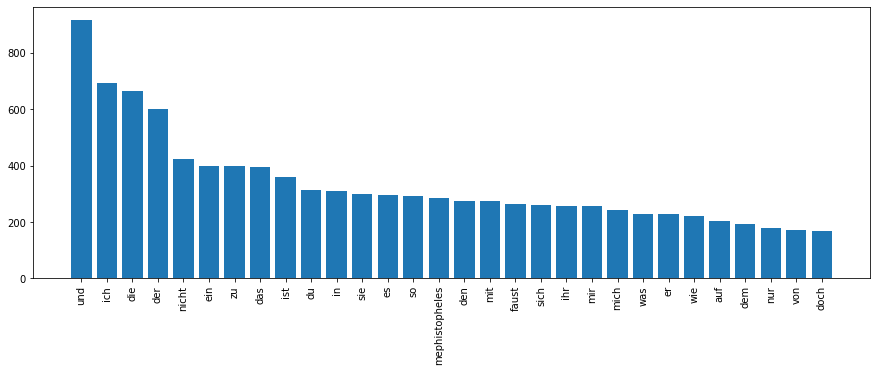

30 most frequent words:
('und', 'ich', 'die', 'der', 'nicht', 'ein', 'zu', 'das', 'ist', 'du', 'in', 'sie', 'es', 'so', 'mephistopheles', 'den', 'mit', 'faust', 'sich', 'ihr', 'mir', 'mich', 'was', 'er', 'wie', 'auf', 'dem', 'nur', 'von', 'doch')


In [4]:
# Plot a histogram of the most frequent words
# range_top = how many values will be used for histogram
# Original value: range_top = 30
range_top = 30

words, frequencies = zip(*frequent_words)
x = range(range_top)
y = list(frequencies[0:range_top])
plt.figure(figsize=(15, 5))
plt.xticks(x, words[0:range_top], rotation='vertical')
plt.bar(x, y)
plt.show()
print(str(range_top) + ' most frequent words:')
print(words[0:range_top])

### Stop words  
Now remove stop words (given in stopwords.txt) and perform analysis again. What has changed? Note that stopwords-list includes only English stop-words where as stopwords-de.txt has stop words for Germany.

Library NLTK is useful for natural language processing. The stop word [list](https://gist.github.com/sebleier/554280) is taken from that library. The German stop word [list](https://github.com/stopwords-iso/stopwords-de) is available also in Git-hub. Also Finnish stop-words are to be found in [here](https://github.com/stopwords-iso/stopwords-fi).

Each language needs own list of stop words. Depending of the analysis goal, stop words might still include essential information.

In [5]:
# creating corpus of stop-words
s_words = {0:'stopwords.txt',1:'stopwords.txt',2:'stopwords-de.txt',3:'stopwords-fi.txt'}
stop_words = get_corpus(s_words[text_choice])
#"stopwords.txt"       # English stop words
#'stopwords-de.txt'    # German stop words
#'stopwords-fi.txt'    # Finnish stop words
print('There are ' + str(len(stop_words)) + ' stop words, which are:')
print(stop_words)

There are 621 stop words, which are:
['a', 'ab', 'aber', 'ach', 'acht', 'achte', 'achten', 'achter', 'achtes', 'ag', 'alle', 'allein', 'allem', 'allen', 'aller', 'allerdings', 'alles', 'allgemeinen', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'au', 'auch', 'auf', 'aus', 'ausser', 'ausserdem', 'außer', 'außerdem', 'b', 'bald', 'bei', 'beide', 'beiden', 'beim', 'beispiel', 'bekannt', 'bereits', 'besonders', 'besser', 'besten', 'bin', 'bis', 'bisher', 'bist', 'c', 'd', 'dh', 'da', 'dabei', 'dadurch', 'dafür', 'dagegen', 'daher', 'dahin', 'dahinter', 'damals', 'damit', 'danach', 'daneben', 'dank', 'dann', 'daran', 'darauf', 'daraus', 'darf', 'darfst', 'darin', 'darum', 'darunter', 'darüber', 'das', 'dasein', 'daselbst', 'dass', 'dasselbe', 'davon', 'davor', 'dazu', 'dazwischen', 'daß', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'dem', 'dementsprechend', 'demgegenüber', 'demgemäss', 'demgemä

Removing stop words from the word_counts.

In [6]:
for word in stop_words:
    if word in word_counts:
        del word_counts[word]

Compare the reduced size of unique words

In [7]:
print('Corpus size is ' + str(len(corpus)) + ' words.')
print('Corpus contains ' + str(len(word_counts)) + ' unique words.')

# Sort words according to frequency (from most to least frequent)
frequent_words = sorted(word_counts.items(), key=lambda kv: kv[1], reverse=True)

# Print out the most frequent words, along with their frequencies
range_top = 30

print(str(range_top) + ' most frequent words:')
print(frequent_words[0:range_top])

Corpus size is 30729 words.
Corpus contains 6236 unique words.
30 most frequent words:
[('mephistopheles', 286), ('faust', 264), ('margarete', 85), ('–', 82), ('geist', 55), ('welt', 52), ('bey', 51), ('marthe', 45), ('herr', 41), ('hab’', 40), ('leben', 39), ('gehn', 38), ('teufel', 37), ('laß', 36), ('seyn', 35), ('gretchen', 35), ('herz', 32), ('fort', 32), ('nacht', 30), ('frosch', 30), ('sey', 28), ('ist’s', 27), ('herrn', 27), ('weh', 27), ('seyd', 26), ('kind', 26), ('mutter', 26), ('weiß', 25), ('herzen', 24), ('seh’', 24)]


And plot the histogram

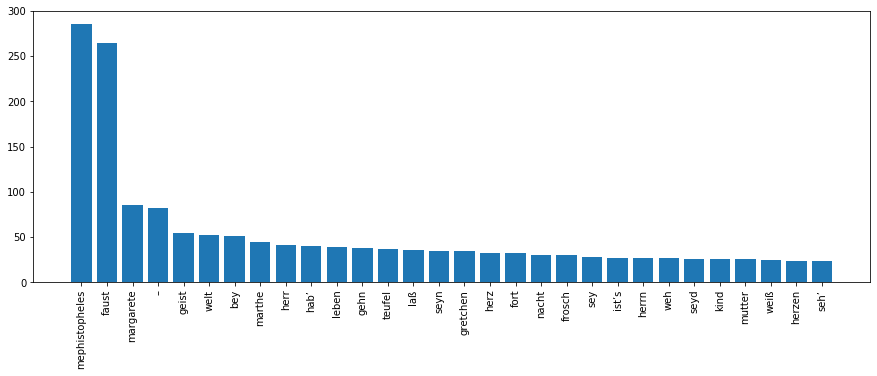

30 most frequent words:
('mephistopheles', 'faust', 'margarete', '–', 'geist', 'welt', 'bey', 'marthe', 'herr', 'hab’', 'leben', 'gehn', 'teufel', 'laß', 'seyn', 'gretchen', 'herz', 'fort', 'nacht', 'frosch', 'sey', 'ist’s', 'herrn', 'weh', 'seyd', 'kind', 'mutter', 'weiß', 'herzen', 'seh’')


In [8]:
# Plot a histogram of the most frequent words with stop words eliminated
# range_top = how many values will be used for histogram
# Original value: range_top = 30
range_top = 30

words, frequencies = zip(*frequent_words)
x = range(range_top)
y = list(frequencies[0:range_top])
plt.figure(figsize=(15, 5))
plt.xticks(x, words[0:range_top], rotation='vertical')
plt.bar(x, y)
plt.show()
print(str(range_top) + ' most frequent words:')
print(words[0:range_top])

### Create word-vectors  
To create embeddings, or word vectors, manually is relatively complex. Do not spend too much time here unless this is necessary for your task. We will perform word to vector for   
  
To create word vector following steps are needed:  
1. Identify all unique words in the corpus.  
2. For each sentence, create vector presentation of the sentence.  
3. Add word-vector to vector corpus.  


In [9]:
# Create word-vector from word_counts dictionary
word_vector=list(word_counts)
word_to_index = dict()
index_to_word = dict()

# Build index for one hot coding
for index, word in enumerate(word_vector):
    word_to_index[word]=index
    index_to_word[index]=word

In [10]:
# Source: https://stackoverflow.com/questions/4576077/how-can-i-split-a-text-into-sentences

# -*- coding: utf-8 -*-
import re
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [11]:
def read_line_from(filename,lnr):
    with open(filename, encoding="utf8") as f:
        text_lines = f.readlines()
    return text_lines[lnr].replace('\n','')

In [12]:
def sentences_from(filename):    
    with open(filename, encoding="utf8") as f:
        all_text = f.read()
    sentences = split_into_sentences(all_text)
    return sentences

In [13]:
sentences = sentences_from(texts[text_choice])
print("Checking the raw read out vs parsing")
print("\nRaw text readout\n")
for i in range(10):
    print(read_line_from(texts[text_choice],i))

print("\nParsed sentences\n")
print(sentences[0])

Checking the raw read out vs parsing

Raw text readout

_Zueignung._


Ihr naht euch wieder, schwankende Gestalten!
Die früh sich einst dem trüben Blick gezeigt.
Versuch’ ich wohl euch diesmal fest zu halten?
Fühl’ ich mein Herz noch jenem Wahn geneigt?
Ihr drängt euch zu! nun gut, so mögt ihr walten,
Wie ihr aus Dunst und Nebel um mich steigt;
Mein Busen fühlt sich jugendlich erschüttert

Parsed sentences

_Zueignung.


### Create word-vector  
The sentences are the same as above. The word vector length is same as unique words after stop-word removal.  
  
The examples from [MachineLearningMastery](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/) has been on source of information in addition of [TowardsDataScience](https://towardsdatascience.com/word2vec-from-scratch-with-numpy-8786ddd49e72).

In [14]:
# Dictionary containing word_vector of each sentense, by order number
word_vectors = {}

limit = 10

for i, sentence in enumerate(sentences):
    if i>limit: # Increase this number to see more sentences, finally comment out if-clause and run whole book
        break
    if limit<100:
        print("Sentence {} is: {}".format(i, sentence))

    v_vect = np.zeros((len(word_counts),1))
    
    words_in_sentence=sentence.split(' ')
    for word in words_in_sentence:
        if len(word)<2:
            continue
        word = word.translate(str.maketrans('', '', string.punctuation))
        try:
            v_vect[word_to_index[word]]+=1
        except:
            pass #print("word {} not in word_vect".format(word))
    word_vectors[i]=v_vect

Sentence 0 is: _Zueignung.
Sentence 1 is: _   Ihr naht euch wieder, schwankende Gestalten!
Sentence 2 is: Die früh sich einst dem trüben Blick gezeigt.
Sentence 3 is: Versuch’ ich wohl euch diesmal fest zu halten?
Sentence 4 is: Fühl’ ich mein Herz noch jenem Wahn geneigt?
Sentence 5 is: Ihr drängt euch zu!
Sentence 6 is: nun gut, so mögt ihr walten, Wie ihr aus Dunst und Nebel um mich steigt; Mein Busen fühlt sich jugendlich erschüttert Vom Zauberhauch der euren Zug umwittert.
Sentence 7 is: Ihr bringt mit euch die Bilder froher Tage, Und manche liebe Schatten steigen auf; Gleich einer alten, halbverklungnen Sage, Kommt erste Lieb’ und Freundschaft mit herauf; Der Schmerz wird neu, es wiederholt die Klage Des Lebens labyrinthisch irren Lauf, Und nennt die Guten, die, um schöne Stunden Vom Glück getäuscht, vor mir hinweggeschwunden.
Sentence 8 is: Sie hören nicht die folgenden Gesänge, Die Seelen, denen ich die ersten sang, Zerstoben ist das freundliche Gedränge, Verklungen ach!
Senten

In [15]:
import pprint
pprint.pprint(word_vectors)

{0: array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]),
 1: array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]]),
 2: array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]),
 3: array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]),
 4: array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]),
 5: array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]),
 6: array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]),
 7: array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]),
 8: array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]),
 9: array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]),
 10: array([[0.],
       [0.],
       [0

#### Alternate approach, not executing the whole book  

Some libraries offer useful tools. However, when applying those, one may need to use *np.expand_dims* as each new sentence brings new keys.

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# in below, only word_counts list is tranformed
# in practise, we should loop one sentence at time throught this encoder
data = list(word_counts)
values = np.array(data)
print(values)

l_encoder = LabelEncoder()
int_encoded = l_encoder.fit_transform(values)
print(int_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
int_encoded = int_encoded.reshape(len(int_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(int_encoded)
print(onehot_encoded)

inverted = l_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
print(inverted)

['zueignung' 'naht' 'schwankende' ... 'gerichtet' 'innen' 'verhallend']
[6108 3578 4399 ... 1918 2699 5390]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['zueignung']


### Task 2: Create same functionality as in Task but capitalize library functions:  

Python has several useful libraries.  
1. [NLTK](https://www.nltk.org/)  
2. [scikit-learn](https://scikit-learn.org/stable/modules/classes.html?highlight=feature%20extraction#module-sklearn.feature_extraction)  

From scikit-learn following functions may prove practical:  

```python
sklearn.feature_extraction.text.TfidfVectorizer  
sklearn.feature_extraction.text.CountVectorizer

from sklearn.feature_extraction.text import TfidVectorizer,CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(text)
print(vectorizer.vocabulary_)
```

[An insteresting web site](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/) describes how to perform text preprocessing among other machine learning topics.

About this topic further deep dive is available by [reading](https://arxiv.org/pdf/1511.07916.pdf)

In [17]:
# nltk book is ~100MB and all files ~1GB.
# This script opens dialogue to install NLTK library
# Select BOOK and download see: https://www.nltk.org/book/ch01.html
try:
    install = input('Do you want to download NLTK library (type yes to confirm)? ').lower()
    if install == 'yes':
        print("Select BOOK and download. Then exit loader!")
        import nltk
        nltk.download() 
        print('Natural Language ToolKit installed')
    else:
        print('NLTK not installed.')
except:
    raise Exception('You cannot install libraries')

Do you want to download NLTK library (type yes to confirm)? no
NLTK not installed.


In [18]:
# TODO: implement word vectorization by library tools. Perform TF/IDF.


### Tasks 3 and 4: Apply natural language processing for with real data in network  

Recommended libraries to access network:
1. [URLLIB](https://docs.python.org/3/library/urllib.html) and [URLLIB3](https://urllib3.readthedocs.io/en/latest/index.html)  
2. [BeautifulSoup](https://pypi.org/project/beautifulsoup4/)  
3. [Requests](https://requests.readthedocs.io/en/master/)  

Recommended for Levenhstein:  
3. [Levenhstein](https://pypi.org/project/python-Levenshtein/)


This task is recommended to check with sufficient time.

In [19]:
# Helper for authorization
import requests

class BearerAuth(requests.auth.AuthBase):
    def __init__(self, token):
        self.token = token
    def __call__(self, r):
        r.headers["authorization"] = "Bearer " + self.token
        return r

In [20]:
# Helper for accessing web
import requests
import urllib.request
from requests.auth import HTTPBasicAuth

#from bs4 import BeautifulSoup # for parsing

URL ="https://www.kielitoimistonsanakirja.fi"
haku="/api/search/api/v1/search?keyword="
word="koira"

# Make your own key, change below key by removing random section
key="No1amount2of3correction4can5outweigh6the7strength8of9encouragement.\
Correction0does1much,2but3encouragement4does5more."
header = {'User-Agent': 'Mozilla/5.0'}

# Just reading URL content
#req = requests.get(URL,headers=headers)

# Reading URL with authentication
response = requests.get(URL, auth=BearerAuth(key))

print(response.headers)


{'Date': 'Tue, 20 Apr 2021 12:03:46 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d06b06e6902009ee130e8bad6633e2c881618920226; expires=Thu, 20-May-21 12:03:46 GMT; path=/; domain=.kielitoimistonsanakirja.fi; HttpOnly; SameSite=Lax; Secure', 'X-Dns-Prefetch-Control': 'off', 'X-Frame-Options': 'SAMEORIGIN', 'Strict-Transport-Security': 'max-age=15552000; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-Xss-Protection': '1; mode=block', 'Content-Security-Policy': "default-src 'self'; script-src 'self' 'unsafe-eval' 'nonce-2i7yvpnynv' 'nonce-pJLd4vIzbH' www.google-analytics.com www.googletagmanager.com www.google.com www.gstatic.com ajax.googleapis.com; connect-src 'self' https://www.google-analytics.com https://api.airbrake.io; style-src 'self' 'unsafe-inline' fonts.googleapis.com; img-src 'self' blob: data: www.google-analytics.com www.googletagmanager.com ww

In [21]:
# TODO: implement Levenhstein distance against Kotus dictionary
